# Exploring submissions in Hacker News data set 


## Project overview

This project is about the popular website [Hacker News](https://news.ycombinator.com/) (HN), a social news website that mixes computer science and entrepreneurship. We´ll explore some trends in the data set of HN site, more specifically, we are interested in submissions where users ask questions (**Ask HN** posts) or show a project, product or something interesting (**Show HN** posts).

## Goal
* Investigate which posts (ask or show) receive more comments on average;
* Determine if posts created at a specific time receive more comments.

## Tools
* Python
* Jupyter Lab

## Getting to know the data

The data set is formed by HN posts from 12 months (up to September 26, 2016). We'll use here a reduced version of the original [data set](https://www.kaggle.com/hacker-news/hacker-news-posts) (from almost 300k rows was reduced to approximately 20k rows) obtained by removing all submissions that did not receive any comments, and then randomly sampling the remaining submissions.

 
|**Table 1.** Features in the Hacker News data set.                                      |
|:--------------------------------------------------------------------------------------------|

|Feature      | Description                                                                   | 
|:------------|:------------------------------------------------------------------------------|
|id           | identification number                                                         |   
|title        | title of the post (self explanatory)                                          |
|url          | the url of the item being linked to                                           |
|num_points   | the number of upvotes the post received                                       |
|num_comments | the number of comments the post received                                      |
|author       | the name of the account that made the post                                    |
|created_at   | the date and time the post was made (the time zone is Eastern Time in the US) |


We'll start reading the data set file and displaying the first rows of it using a previously created user-defined function `explore_data`.

In [1]:
# Exploring data sets with the user-defined function explore_data()
def explore_data(dataset, start, end, rows_and_columns=False):     
    """
    Prints rows in a readable way and then shows the number of rows and columns of a selected data set.
    
    : dataset, expected to be a list
    : start and end, integers that represent the starting and ending indices of a slice from the data set
    : rows_and_columns is a boolean whose default argument is False; if it is True prints the number of rows and columns  
    : the function expects data doesn't have a header row, otherwise it will print one more row compared to the actual lenght
    """
    dataset_slice = dataset[start:end]
    for row in dataset_slice:
        print(row)
        print('\n')  # adds an empty new line after each row
        
    if rows_and_columns:
        print('Number of rows    =', len(dataset))
        print('Number of columns =', len(dataset[0]))

In [2]:
# Opening the reduced HN data set
from csv import reader

hn_file = open('hacker_news.csv', encoding='utf8')
read_hn = reader(hn_file)
hn_dataset = list(read_hn)
hn_header = hn_dataset[0]
hn_dataset = hn_dataset[1:]

Using the user-defined function `explore_data` we can examine the first rows of the data set.

In [3]:
# Examining the data set using the user-defined function explore_data 
print('\n{:|^72}\n'.format(' HACKER NEWS DATA SET '))
print(hn_header, '\n')
explore_data(hn_dataset, 0, 5, rows_and_columns=True)
print('{:^^72}\n'.format(' HACKER NEWS DATA SET '))                    


||||||||||||||||||||||||| HACKER NEWS DATA SET |||||||||||||||||||||||||

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'] 

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']


['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']


['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']


['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies

## Filtering posts

The data set has dimensions of 20100 rows $\times$ 7 columns.

Considering that we want to investigate which HN posts (ask or show) will receive more comments on average, we must filter this information. 

Because the titles of these posts begin with `Ask HN` or `Show HN` we can use this information as a criterion to create new lists containing these data separately. Since capitalization matters, we can apply first the `lower` method to have a lowercase version of the string and then use the `startswith` method to search for `Ask HN` or `Show HN` at the beginning of the string.

In [4]:
# creating different lists to separate specific posts
ask_posts = []         # Ask HN posts  
show_posts = []        # Show HN posts 
other_posts = []       

for row in hn_dataset:
    title = row[1]
    if title.lower().startswith('ask hn'):      # identify Ask HN post
        ask_posts.append(row)
    elif title.lower().startswith('show hn'):   # identify Show HN post
        show_posts.append(row)
    else:
        other_posts.append(row)                 # any other type of post

Once again we can use the function `explore_data` to examine our new lists.

In [5]:
print('\n{:|^72}\n'.format(' ask_posts list '))
explore_data(ask_posts, 0, 3, rows_and_columns=True)
print('{:^^72}\n'.format(' ask_posts list '))     


|||||||||||||||||||||||||||| ask_posts list ||||||||||||||||||||||||||||

['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55']


['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43']


['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016 10:14']


Number of rows    = 1744
Number of columns = 7
^^^^^^^^^^^^^^^^^^^^^^^^^^^^ ask_posts list ^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [6]:
print('\n{:|^72}\n'.format(' show_posts list '))
explore_data(show_posts, 0, 3, rows_and_columns=True)
print('{:^^72}\n'.format(' show_posts list '))     


||||||||||||||||||||||||||| show_posts list ||||||||||||||||||||||||||||

['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03']


['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46']


['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05']


Number of rows    = 1162
Number of columns = 7
^^^^^^^^^^^^^^^^^^^^^^^^^^^ show_posts list ^^^^^^^^^^^^^^^^^^^^^^^^^^^^



In [7]:
print('\n{:|^72}\n'.format(' other_posts list '))
explore_data(other_posts, 0, 3, rows_and_columns=True)
print('{:^^72}\n'.format(' other_posts list '))   


||||||||||||||||||||||||||| other_posts list |||||||||||||||||||||||||||

['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52']


['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30']


['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20']


Number of rows    = 17194
Number of columns = 7
^^^^^^^^^^^^^^^^^^^^^^^^^^^ other_posts list ^^^^^^^^^^^^^^^^^^^^^^^^^^^



From 20100 Hacker News' posts, 1162 are Show posts, 1744 Ask posts, and 17194 other post types. These observations are better visualized in **Figure 1**.

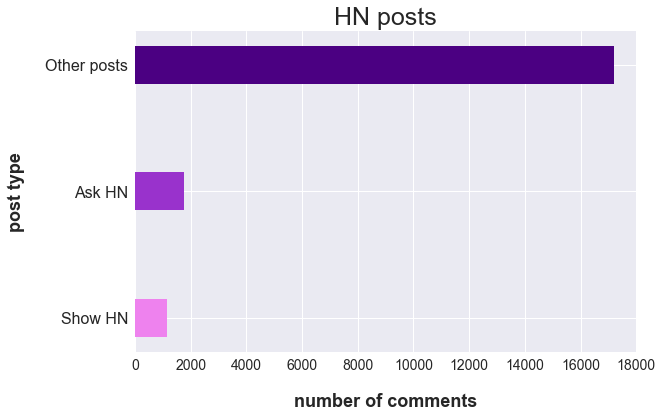

 Figure 1. Post types in Hacker News website.



In [28]:
import matplotlib.pyplot as plt
import numpy as np

# data from the previous step
counts = [1162, 1744, 17194]
names = ['Show HN', 'Ask HN', 'Other posts']
index = np.arange(len(names))

bar_width = 1.0
width = 0.3

plt.style.use('seaborn')
plt.barh(index, counts, width, bar_width, align='center', color=('violet', 'darkorchid', 'indigo'))
plt.ylabel('post type', fontsize=15, labelpad=20, weight='bold', size=18)
plt.xlabel('number of comments', fontsize=15, labelpad=20, weight='bold', size=18)
plt.yticks(index, names, fontsize=16, rotation=0)
plt.xticks(fontsize=14, rotation=0)
plt.xlim(0, 18000)
plt.title('HN posts', fontsize=25)
plt.show()

print('\033[1m Figure 1\033[0m. Post types in Hacker News website.\n')  # using unicode for bold

## Analyzing which type of post received more comments

Now that we filter the posts of interest, we can investigate which of them received more comments on average. For this, we can compare the calculated values for the average number of comments for Ask HN and Show HN posts.

In [9]:
# Calculating the average number of comments in Ask HN posts
total_ask_comments = 0

for row in ask_posts:
    num_ask_comments = int(row[4])
    total_ask_comments += num_ask_comments
    
avg_ask_comments = total_ask_comments / len(ask_posts)
print('>>> Ask HN average number of comments  = {:.1f}\n'.format(avg_ask_comments))

# Calculating the average number of comments in Show HN posts
total_show_comments = 0

for row in show_posts:
    num_show_comments = int(row[4])
    total_show_comments += num_show_comments  
    
avg_show_comments = total_show_comments / len(show_posts)
print('>>> Show HN average number of comments = {:.1f}\n'.format(avg_show_comments))

>>> Ask HN average number of comments  = 14.0

>>> Show HN average number of comments = 10.3



From the previous results, we see that on average, Ask HN posts have about 26.4% more comments than Show HN posts.

This result leads to another question. Are posts created at a certain time more likely to attract comments? To answer it, we'll concentrate only on the more commented posts, that is the Ask HN posts.


### Calculating the number of Ask HN posts created and their comments received
Let's take a look in the date/time format of our data set.

In [10]:
print(ask_posts[200][6])

6/18/2016 16:35


From the above output, the date/time format in our dataset has the following pattern: day/month/year(four digits), hour (24-hour format) and minutes. We'll use this information to create a datetime object below. 

We also can create two dictionaries to store the amount of created posts at each hour during the day plus the number of comments each post received.

### Assessing the number of Ask HN posts created during each hour of the day

We can calculate the amount of Ask HN posts created during each hour of the day and the number of comments it received.

In [11]:
import datetime as dt

result_list = []

for row in ask_posts:
    num_ask_comments = int(row[4])    # post's creation date
    created_at = row[6]               # number of comments
    element_list = [created_at, num_ask_comments]
    result_list.append(element_list)
    
counts_by_hour = {}        # amount of Ask HN posts created during each hour of the day
comments_by_hour = {}      # number of comments each Ask HN post received

for row in result_list:
    date_string = row[0]
    comments = row[1]
    
    # creates a datetime object from our date_string
    datetime_object = dt.datetime.strptime(date_string, '%m/%d/%Y %H:%M')
    
    # extracts the hour
    hour = datetime_object.strftime('%H')

    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] =  comments
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += comments      
    

For the sake of clarity, we can create the user-defined function `sorting_dictionary` to sort the comments by the hour.

In [12]:
def sorting_dictionary(dictionary):
    """
    Take in as input a dictionary, converts it to a list of lists and sort it by its key values. 
    The key value is expected to store the hour values.
    """
    
    list2dict = []
    for key in dictionary:
        item = [int(key), int(dictionary[key])]
        list2dict.append(item)
        
    for row in list2dict:
        if row[0] == 0:
            row[0] = 24   # converts 0 to 24 hour
            
    sorted_dict = sorted(list2dict)    
    
    return sorted_dict

The function `sorting_dictionary` sorts the number of posts created during each hour of the day.

In [13]:
sorting_dictionary(counts_by_hour)

[[1, 60],
 [2, 58],
 [3, 54],
 [4, 47],
 [5, 46],
 [6, 44],
 [7, 34],
 [8, 48],
 [9, 45],
 [10, 59],
 [11, 58],
 [12, 73],
 [13, 85],
 [14, 107],
 [15, 116],
 [16, 108],
 [17, 100],
 [18, 109],
 [19, 110],
 [20, 80],
 [21, 109],
 [22, 71],
 [23, 68],
 [24, 55]]

We can visualize this result in **Figure 2**.

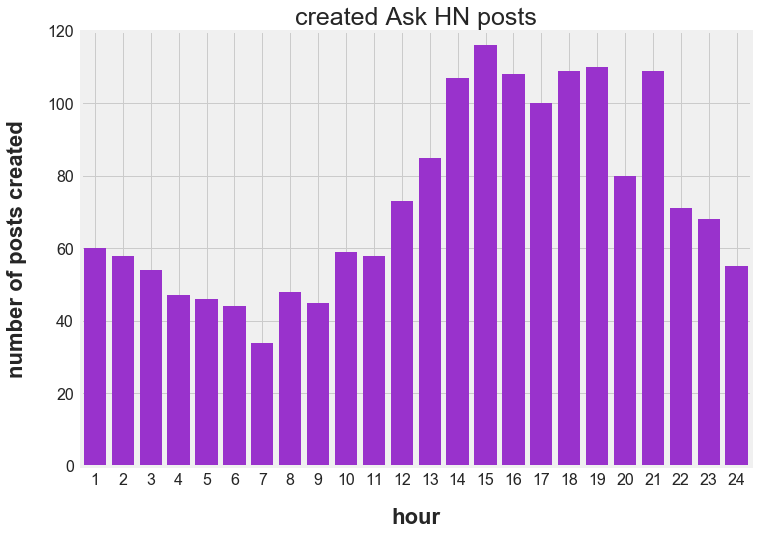

 Figure 2. Amount of Ask HN posts created during each hour of the day.



In [14]:
sorted_counts_by_hour = sorting_dictionary(counts_by_hour)
sorted_counts_by_hour = dict(sorted_counts_by_hour)

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.bar(sorted_counts_by_hour.keys(), sorted_counts_by_hour.values(), color='darkorchid')
plt.title('created Ask HN posts', fontsize=25)
plt.ylabel('number of posts created', fontsize=15, labelpad=20, weight='bold', size=22)
plt.xlabel('hour', fontsize=15, labelpad=20, weight='bold', size=22)
plt.locator_params(axis='x', nbins=47)
plt.ylim(0, 120)
plt.xlim(0.5, 24.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print('\033[1m Figure 2\033[0m. Amount of Ask HN posts created during each hour of the day.\n')  # using unicode for bold

### Assessing the number of Ask HN comments received for each post

The `function sorting_dictionary` also sorts the number of comments each post received during each hour of the day.

In [15]:
sorting_dictionary(comments_by_hour)

[[1, 683],
 [2, 1381],
 [3, 421],
 [4, 337],
 [5, 464],
 [6, 397],
 [7, 267],
 [8, 492],
 [9, 251],
 [10, 793],
 [11, 641],
 [12, 687],
 [13, 1253],
 [14, 1416],
 [15, 4477],
 [16, 1814],
 [17, 1146],
 [18, 1439],
 [19, 1188],
 [20, 1722],
 [21, 1745],
 [22, 479],
 [23, 543],
 [24, 447]]

We can visualize this result in **Figure 3**.

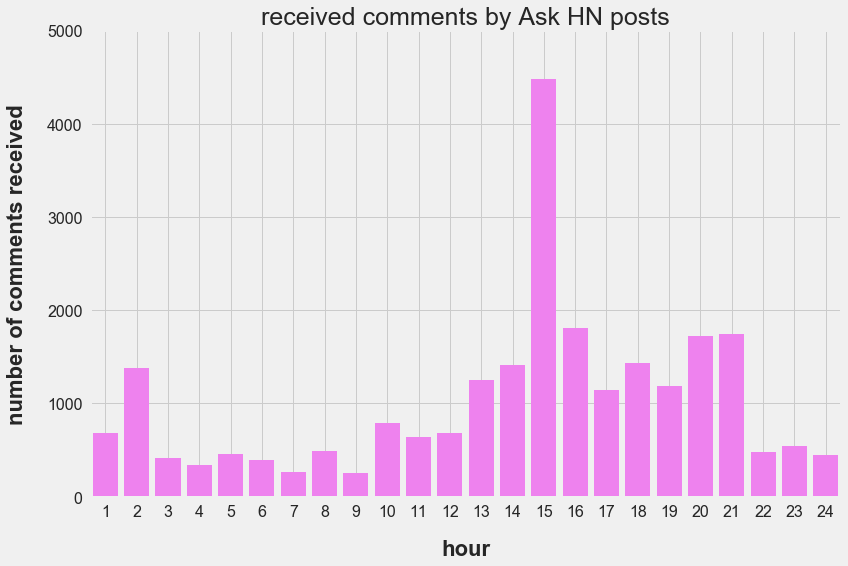

 Figure 3. The number of comments of Ask HN posts received by the hour.



In [16]:
sorted_comments_by_hour = sorting_dictionary(comments_by_hour)
sorted_comments_by_hour = dict(sorted_comments_by_hour)

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.bar(sorted_comments_by_hour.keys(), sorted_comments_by_hour.values(), color='violet')
plt.title('received comments by Ask HN posts', fontsize=25)
plt.ylabel('number of comments received', fontsize=15, labelpad=20, weight='bold', size=22)
plt.xlabel('hour', fontsize=15, labelpad=20, weight='bold', size=22)
plt.locator_params(axis='x', nbins=47)
plt.ylim(0, 5000)
plt.xlim(0.5, 24.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print('\033[1m Figure 3\033[0m. The number of comments of Ask HN posts received by the hour.\n')  # using unicode for bold

### Estimating the average number of comments received by Ask HN posts

The average number of comments received at each hour is determined by dividing the number of comments received by the number of posts created.

In [17]:
avg_by_hour = []

for key_hour in comments_by_hour:
    avg_by_hour.append([int(key_hour), comments_by_hour[key_hour] / counts_by_hour[key_hour]])

In [18]:
# Converting 0 to 24 hour
for row in avg_by_hour:
    if row[0] == 0:
        row[0] = 24   # converts 0 to 24 hour
        
sorted_avg_by_hour = sorted(avg_by_hour)        
 

The average number of comments received can be seen below, and they are also plotted in **Figure 4**.

In [19]:
sorted_avg_by_hour 

[[1, 11.383333333333333],
 [2, 23.810344827586206],
 [3, 7.796296296296297],
 [4, 7.170212765957447],
 [5, 10.08695652173913],
 [6, 9.022727272727273],
 [7, 7.852941176470588],
 [8, 10.25],
 [9, 5.5777777777777775],
 [10, 13.440677966101696],
 [11, 11.051724137931034],
 [12, 9.41095890410959],
 [13, 14.741176470588234],
 [14, 13.233644859813085],
 [15, 38.5948275862069],
 [16, 16.796296296296298],
 [17, 11.46],
 [18, 13.20183486238532],
 [19, 10.8],
 [20, 21.525],
 [21, 16.009174311926607],
 [22, 6.746478873239437],
 [23, 7.985294117647059],
 [24, 8.127272727272727]]

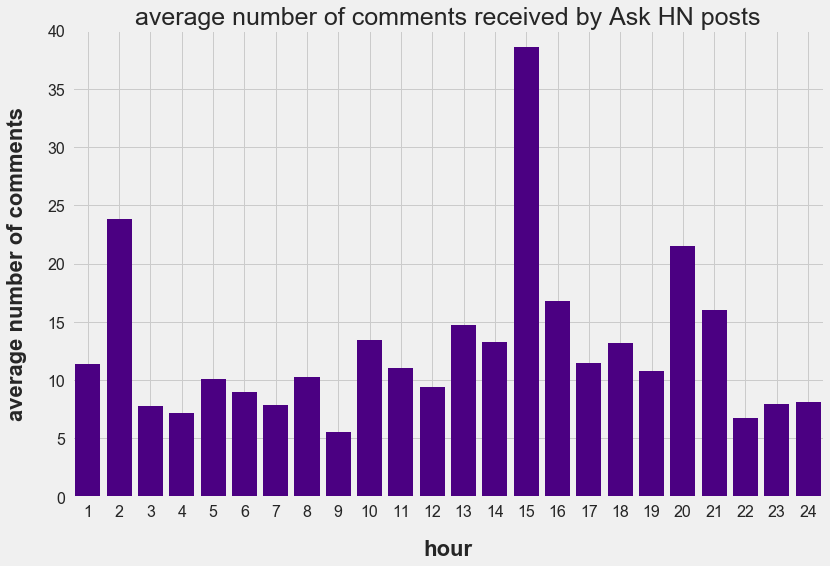

 Figure 4. The average number of comments received by Ask HN posts by the hour.



In [20]:
dict_sorted_avg_by_hour = dict(sorted_avg_by_hour)

plt.figure(figsize=(12, 8))
plt.style.use('fivethirtyeight')
plt.bar(dict_sorted_avg_by_hour.keys(), dict_sorted_avg_by_hour.values(), color='indigo')
plt.title('average number of comments received by Ask HN posts', fontsize=25)
plt.ylabel('average number of comments', fontsize=15, labelpad=20, weight='bold', size=22)
plt.xlabel('hour', fontsize=15, labelpad=20, weight='bold', size=22)
plt.locator_params(axis='x', nbins=47)
plt.ylim(0, 40)
plt.xlim(0.5, 24.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print('\033[1m Figure 4\033[0m. The average number of comments received by Ask HN posts by the hour.\n')  # using unicode for bold

We can also take a look at the top five ranked hours with the highest average comments.

In [21]:
swap_avg_by_hour = []

for key_hour in comments_by_hour:
    swap_avg_by_hour.append([comments_by_hour[key_hour] / counts_by_hour[key_hour], key_hour])

sorted_swap = sorted(swap_avg_by_hour, reverse=True)

print("Top five hours for 'Ask HN' comments:\n")
for average, hour in sorted_swap[:5]:
#    print('{}: {:.2f} average comments per post'.format(row[1], row[0]))
    print(
        "{} => {:.2f} average comments per post".format(
            dt.datetime.strptime(hour, "%H").strftime("%H:%M"),average
        )
    )

Top five hours for 'Ask HN' comments:

15:00 => 38.59 average comments per post
02:00 => 23.81 average comments per post
20:00 => 21.52 average comments per post
16:00 => 16.80 average comments per post
21:00 => 16.01 average comments per post


As we can see in **Figure 4**, the most comments to the 'Ask HN' posts were created at 15:00, 20:00 and 2:00 (timezone is Eastern Time in the US).  These results suggest that these are the best time to post on HN.

### Calculating the number of upvotes Ask/Show HN posts received

We can investigate now if Ask HN or Show HN posts receive more points (upvotes) on average and if posts created at a certain time are more likely to receive more points.

In [22]:
# Ask HN posts
result_ask_num_points = []

for row in ask_posts:
    num_points = int(row[3])  # number of upvotes received for Ask HN posts
    created_at = row[6]       # post's creation date
    element_list = [created_at, num_points]
    result_ask_num_points.append(element_list)

counts_upvotes_by_hour_ask = {}     # counts of upvotes created during each hour of the day
number_upvotes_by_hour_ask = {}     # number of upvotes Ask post received    
    
for row in result_ask_num_points:
    date_string = row[0]
    upvotes = row[1]

    # creates a datetime object from our date_string
    datetime_object = dt.datetime.strptime(date_string, '%m/%d/%Y %H:%M')

    # extracts the hour
    hour = datetime_object.strftime('%H')

    if hour not in counts_upvotes_by_hour_ask:
        counts_upvotes_by_hour_ask[hour] = 1
        number_upvotes_by_hour_ask[hour] = upvotes
    else:
        counts_upvotes_by_hour_ask[hour] += 1
        number_upvotes_by_hour_ask[hour] += upvotes

        
# Show HN posts    
result_show_num_points = []

for row in show_posts:
    num_points = int(row[3])  # number of upvotes received for Show HN posts
    created_at = row[6]       # post's creation date
    element_list = [created_at, num_points]
    result_show_num_points.append(element_list)
    
counts_upvotes_by_hour_show = {}     # counts of upvotes created during each hour of the day
number_upvotes_by_hour_show = {}     # number of upvotes Show post received    
    
for row in result_show_num_points:
    date_string = row[0]
    upvotes = row[1]

    # creates a datetime object from our date_string
    datetime_object = dt.datetime.strptime(date_string, '%m/%d/%Y %H:%M')

    # extracts the hour
    hour = datetime_object.strftime('%H')

    if hour not in counts_upvotes_by_hour_show:
        counts_upvotes_by_hour_show[hour] = 1
        number_upvotes_by_hour_show[hour] = upvotes
    else:
        counts_upvotes_by_hour_show[hour] += 1
        number_upvotes_by_hour_show[hour] += upvotes

#### Determining the average number of upvotes by the hour for Ask HN posts

In [23]:
avg_upvotes_by_hour_ask = []

for key_hour in number_upvotes_by_hour_ask:
    avg_upvotes_by_hour_ask.append([int(key_hour), number_upvotes_by_hour_ask[key_hour] / counts_upvotes_by_hour_ask[key_hour]])
    
# Converting 0 to 24 hour
for row in avg_upvotes_by_hour_ask:
    if row[0] == 0:
        row[0] = 24   # converts 0 to 24 hour      

We can use the built-in function `sorted` to sort the average number of upvotes.

In [24]:
sorted_avg_upvotes_by_hour_ask = sorted(avg_upvotes_by_hour_ask) 
sorted_avg_upvotes_by_hour_ask

[[1, 11.666666666666666],
 [2, 13.672413793103448],
 [3, 6.925925925925926],
 [4, 8.27659574468085],
 [5, 12.0],
 [6, 13.431818181818182],
 [7, 10.617647058823529],
 [8, 10.729166666666666],
 [9, 7.311111111111111],
 [10, 18.677966101694917],
 [11, 14.224137931034482],
 [12, 10.712328767123287],
 [13, 24.258823529411764],
 [14, 11.981308411214954],
 [15, 29.99137931034483],
 [16, 23.35185185185185],
 [17, 19.41],
 [18, 15.972477064220184],
 [19, 13.754545454545454],
 [20, 14.3875],
 [21, 15.788990825688073],
 [22, 7.197183098591549],
 [23, 8.544117647058824],
 [24, 8.2]]

#### Determining the average number of upvotes by the hour for Show HN posts

In [25]:
avg_upvotes_by_hour_show = []

for key_hour in number_upvotes_by_hour_show:
    avg_upvotes_by_hour_show.append([int(key_hour), number_upvotes_by_hour_show[key_hour] / counts_upvotes_by_hour_show[key_hour]])
    
# Converting 0 to 24 hour
for row in avg_upvotes_by_hour_show:
    if row[0] == 0:
        row[0] = 24   # converts 0 to 24 hour

We can also use the built-in function `sorted` to sort the average number of upvotes.

In [26]:
sorted_avg_upvotes_by_hour_show = sorted(avg_upvotes_by_hour_show)        
sorted_avg_upvotes_by_hour_show

[[1, 25.0],
 [2, 11.333333333333334],
 [3, 25.14814814814815],
 [4, 14.846153846153847],
 [5, 5.473684210526316],
 [6, 23.4375],
 [7, 19.0],
 [8, 15.264705882352942],
 [9, 18.433333333333334],
 [10, 18.916666666666668],
 [11, 33.63636363636363],
 [12, 41.68852459016394],
 [13, 24.626262626262626],
 [14, 25.430232558139537],
 [15, 28.564102564102566],
 [16, 28.322580645161292],
 [17, 27.107526881720432],
 [18, 36.31147540983606],
 [19, 30.945454545454545],
 [20, 30.316666666666666],
 [21, 18.425531914893618],
 [22, 40.34782608695652],
 [23, 42.388888888888886],
 [24, 37.83870967741935]]

These results are better visualized in **Figure 5**.

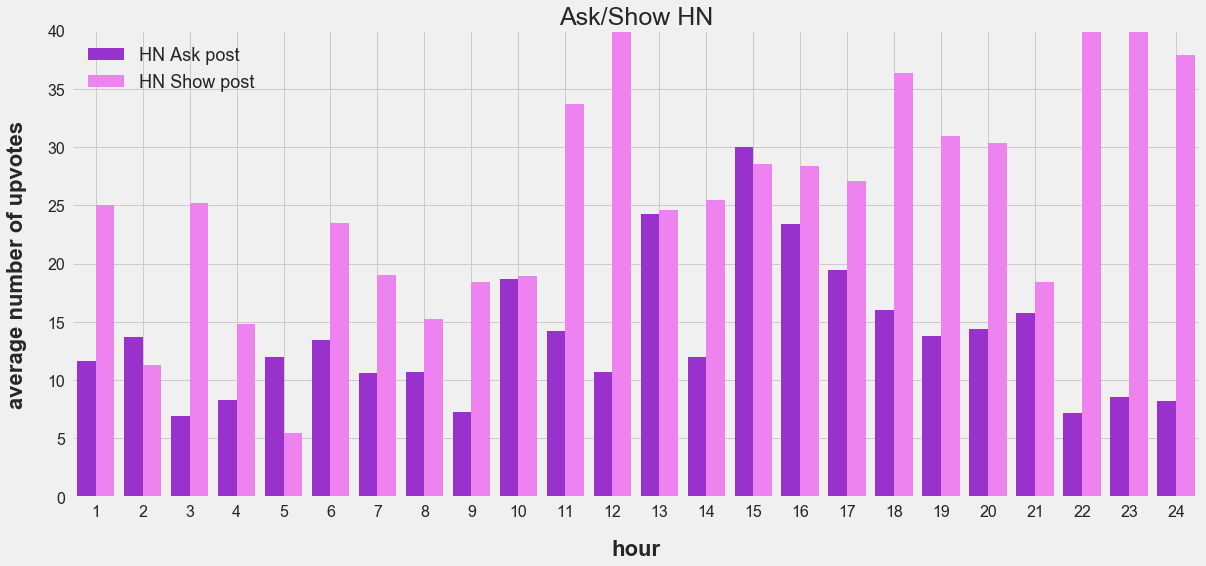

 Figure 5. The average number of upvotes received for Ask/Show HN posts by the hour.



In [27]:
dict_sorted_avg_by_hour_ask = dict(sorted_avg_upvotes_by_hour_ask)
dict_sorted_avg_by_hour_show = dict(sorted_avg_upvotes_by_hour_show)

plt.figure(figsize=(18, 8))
plt.style.use('fivethirtyeight')
barWidth = 0.1
X = np.arange(len(dict_sorted_avg_by_hour_ask))+1 
ax = plt.subplot(111)
ax.bar(X-0.2, dict_sorted_avg_by_hour_ask.values(), width = 0.4, color='darkorchid', align='center')
ax.bar(X+0.2, dict_sorted_avg_by_hour_show.values(), width = 0.4, color='violet', align='center')
ax.legend(('HN Ask post','HN Show post'), prop={'size':18})
plt.title('Ask/Show HN', fontsize=25)
plt.ylabel('average number of upvotes', fontsize=15, labelpad=20, weight='bold', size=22)
plt.xlabel('hour', fontsize=15, labelpad=20, weight='bold', size=22)
plt.locator_params(axis='x', nbins=47)
plt.ylim(0, 40)
plt.xlim(0.5, 24.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
print('\033[1m Figure 5\033[0m. The average number of upvotes received for Ask/Show HN posts by the hour.\n')  # using unicode for bold

Although Ask HN posts have more views comparing with Show HN posts, as previously demonstrated, it seems from **Figure 5** that Show HN posts receive, in general, more upvotes than Ask HN posts. Moreover, the increase in Show HN post upvotes occurs outside the peak hour (around 15:00) for Ask HN comments, where most comments are received. 

### Comparing the number of comments with the number of upvotes received by Ask HN posts

We can also compare the number of comments with the number of upvotes received by Ask HN posts using previously obtained dictionaries.

## Conclusions

We investigated which HN posts (Ask or Show) received more comments on average and found the best time to post Ask HN posts, in order to increase the amount of received comments. The number of upvotes can sugest that Ask and Show posts can exhibit different user profiles, an interesting question that could be addressed further. Finally, the trends in upvotes and comments received by Ask HN posts are very similar and sugest that not all commenters of these post vote.